# Machine Learning using FluxML
([Back to Overview](../index.html#/0/5))

This example is taken from Randy Davila. The original is available on the TalkJulia website: https://www.talkjulia.com/ (with only minor tweaks).

This is a really good resource!

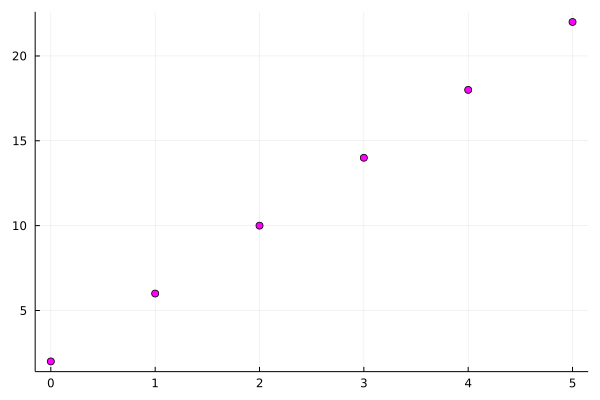

In [1]:
using Flux
using Plots

# Target Function
target_function(x) = @. 4x + 2

# Create Artificial Data
# Note! These are row feature vectors
x_train, x_test = hcat(0:5...), hcat(6:10...)

# Apply the target function to the test and train row vectors
y_train, y_test = target_function(x_train), target_function(x_test)

# Visualize the data 
Plots.scatter(x_train, y_train, color = "magenta", legend = false)

In [2]:
x_train

1×6 Matrix{Int64}:
 0  1  2  3  4  5

In [3]:
y_train

1×6 Matrix{Int64}:
 2  6  10  14  18  22

---

## The Single Artificial Neuron Model
A **single artificial neuron** is a **computational unit**, or **function**, that takes as input a feature vector, and outputs a real value in the case of regression, or a label in the case of classification. The single neuron model consist of several fields depicted in the figure below. 

<p align="center">
    <img src="single_neuron.png" width="500">
</p>

We can create a single artificial neuron with one weight and one bias using Flux.jl. For example, 
```julia
# Define a simple model with one input node
model = Flux.Dense(1, 1)

println("model weight variable = $(model.W)")
println("model bias variable = $(model.b)")
```

---

In [4]:
# Define a simple model with one input node
model = Flux.Dense(1, 1)

# 
println("model weight variable = $(model.W)") # OR model.weight
println("model bias variable = $(model.b)") # OR model.bias

model weight variable = Float32[1.646012;;]
model bias variable = Float32[0.0]


---

Single artifical neurons are functions, and Flux.jl treats them as such:
```julia
# Models are predictive functions
model(x_train)
```

---

In [5]:
# Models are predictive functions
model(x_train)

1×6 Matrix{Float32}:
 0.0  1.64601  3.29202  4.93804  6.58405  8.23006

---

For linear regression, it is standard to set the loss function of our single neuron to be the **mean squared error function**:
$
MSE(X, y) = \frac{1}{2N}\sum_{i=1}^N(\hat{y}_i - y_i)^2
$

We can define this loss function with the following code.
```julia
loss(x, y) = Flux.Losses.mse(model(x), y)

println("Current Loss = $(loss(x_train, y_train))")
```

---

In [6]:
# Define Mean Squared Error Loss Function
loss(x, y) = Flux.Losses.mse(model(x), y)

println("Current Loss = $(loss(x_train, y_train))")

Current Loss = 78.33477


---

In order to **train**, or update, the single neurons weights and bias to minimize the loss function we need to define an optimizer, such as **gradient descent**, or **ADAM**. We will also need to format are training data as an ```Array``` of tuples $(x, y)$, and gather the weights and bias of the single neuron. 
```julia
# Define Gradient Descent Optimizer
opt = Flux.Descent()

# Format your Data
data = [(x_train, y_train)]

# Collect weights and bias for your Models
parameters = Flux.params(model)
```

---

In [7]:
# Define Gradient Descent Optimizer
opt = Flux.Descent(0.01)

# Format your Data
data = [(x_train, y_train)]

# Collect weights and bias for your Models
parameters = Flux.params(model)

Params([Float32[1.646012;;], Float32[0.0]])

---

Now that we have a loss function, parameters to be trained, training data, and an optimizer, we can next train our paramaters to decrease the loss function of the model. 
```julia
println("Old Loss = $(loss(x_train, y_train))")

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

println("New Loss = $(loss(x_train, y_train))")
```

---

In [8]:
println("Old Loss = $(loss(x_train, y_train))")

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

println("New Loss = $(loss(x_train, y_train))")

Old Loss = 78.33477
New Loss = 50.62591


---

Suprisingly, ```Flux.Decent()``` is **full gradient descent**. In practice this can be very slow, so we adapt this optimizer to implement **stochastic gradient descent** as follows:
```julia
println("Old Loss = $(loss(x_train, y_train))")
(m, n) = size(x_train)
epochs = 1_000
for _ in 1:epochs
    for i in 1:n
        Flux.train!(loss, parameters, [(x_train[:, i], y_train[:, i])], opt)
        println("New Loss = $(loss(x_train, y_train))")
    end
end
```

---

In [9]:
println("Old Loss = $(loss(x_train, y_train))")
(m, n) = size(x_train)
epochs = 1_000
losses = Float64[]
for _ in 1:epochs
    for i in 1:n
        Flux.train!(loss, parameters, [(x_train[:, i], y_train[:, i])], opt)
        new_loss = loss(x_train, y_train)
        print("New Loss = $(new_loss) \r")
        push!(losses, new_loss)
    end
end

Old Loss = 50.62591


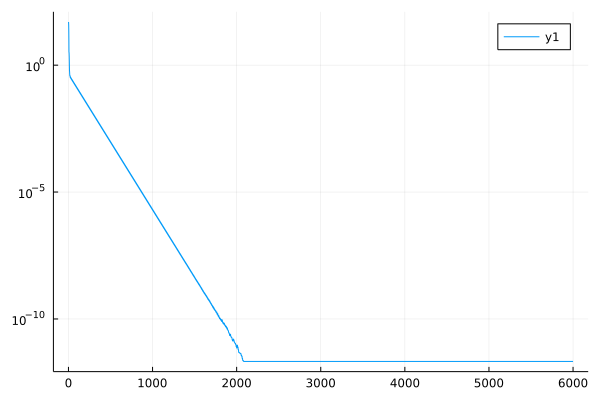

In [10]:
plot(losses, yaxis=:log)

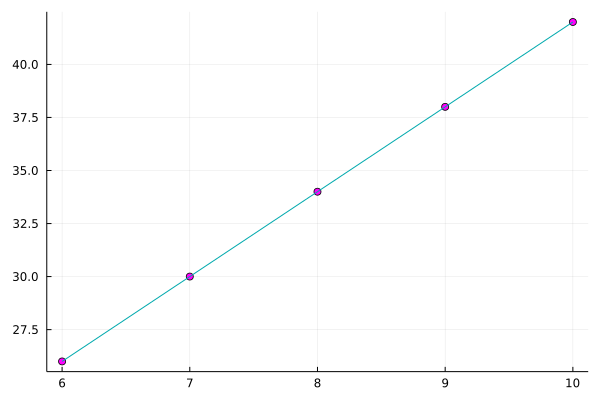

In [11]:
scatter(x_test, y_test, color = "magenta")
domain = LinRange(6, 10, 100)

plot!(domain, domain .* model.W .+ model.b, legend = false)